**How to use Restriction_Finder?**




If you are reading this outside GitHub then you need to fetch the Restriction_Finder.py available at:

https://github.com/JorgeACGomes/Automatic-Restriction-Strategy-Finder

At this repository you will also find two files with sequences that can be used for testing, namely: *seqs.txt* and *seqs_vegas.txt*


If you have doubts on how to automatically ontain and sync sequences n example of how to download and use synced sequences from Genbank can be found at:

https://gist.github.com/BjornFJohansson/3d6496aadf010b709d0d5dc47029efe7


Before trying to run this make sure you have pydna installed, as well as its dependencies.
Check needed dependencies at:

https://github.com/BjornFJohansson/pydna/blob/py3dev/requirements.txt





In [1]:
%matplotlib inline

This line is necessary to make the gel viewable in notebooks, in console ambient may not be needed.

In [2]:
from Restriction_Finder import *

Assuming you are working in the same directory Restriction_Finder.py is stored, this makes it executable.

**Loading the sequences**

Since this program is designed to work with long sequences (>2kb) it may be useful to load the sequences from a file.
Sequences file must be in the same directory as Restriction_Finder module.

Use SeqIO.parse command as follows:
SeqIO.parse(*filename*,*file format*) will read all of the sequences in *filename* in given *file format*.

In [3]:
file = SeqIO.parse('seqs_vegas.txt', 'fasta')
fileseqs = [Dseqrecord(seq, circular=True) for seq in file]

Since it's all set, now you just need to run the *Restriction_Finder* command, providing the sequences, and other optional parameters.
Be aware that this program may take some time to get the best possible result, so don't expect immediate output.
Also some info may be prompted regarding parameters and results.

**Parameters:**
**seqs**: list of Dseqrecord(pydna) objects.

List of Dseqrecords containing all of the sequences. Must contain more than one sequence.

**min_size**: int, float, optional.

Minimum fragment size that is allowed to result from sequence digestion.
Lower fragment size, generally yields best results.

default:150

**r_enzymes**: Restriction_Batch(Biopython) object, optional.

Desired set of enzymes to search from, must be either *All* or *Commercial*

default:*Commercial*

**optim**: bool, optional.

Optimization of enzyme selection. Using *False* will yield faster results, but won't look for the best possible enzyme,
instead it retrieves a random enzyme from a set of possible enzymes.

default:*True*

**gel**: bool, optional.

Whether or not you wish to visualize the agarose gel produced by the chosen enzyme(s).

default:*True*

**iso**: bool, optional.

Whether or not you permit an enzyme that is an isoschizomer as result.
When using *False*, if the best possible enzyme is an isochizomer, the best result will be the following best that is not an isoschizomer.

default:*True*

Notice that you don't need to input all of the parameters, for examples if you want to set *iso* as False and keep other defaults just do the following.

If you just want quick results, and no further use of the results you don't need to assign the method to a variable:

Isoschizomers parameter set to False. Unless all of the possible results are isoschizomers, results will not be optimal

Gel obtained using TatI


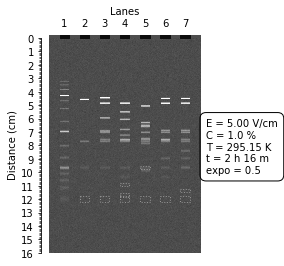

In [4]:
Restriction_Finder(fileseqs, 50, Commercial, iso= False)

Otherwise it may be useful to store it as a variable:

Gel obtained using BpiI


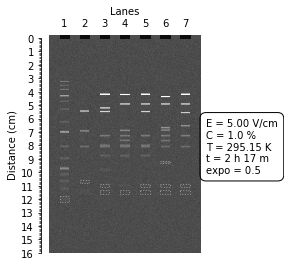

In [5]:
rf = Restriction_Finder(fileseqs, 150)

Which makes possible to access other features of the program.

Other useful info can be obtained by the following methods/attributes:
    
    .lanes()
        When viewing the gel may be useful to look for the names of each lane.
        Be aware that if the sequences are not loaded from a file the lane names will be *Seq* 
        plus the cardinality of the sequence. 
        Same order as they appear on gel.
    
    .solutions()
        If you chose to present the results on a gel, this method presents a more textual and complete result, which includes
        the best enzyme and other possible solutions, that allow for diagnostic digest. 
        If *gel* parameter is False it will be run automatically.
    
    .results
       Returns all of the possible solutions inside a list, including the best one, which may be useful for further use.
       Can be printed for info only.
        
    .best
        This command returns the best enzyme found for the diagnostic digest. 
        To visualize the enzyme must be used like print(rf.best). For further use does not need print().
      
    

In [6]:
rf.lanes()

Lane order:
 ['pJC170_pRS416_RF', 'pJC175_carotenoi', 'pJC178_carotenoi', 'pJC181_carotenoi', 'pJC184_carotenoi', 'pJC187_carotenoi']


In [7]:
sol = rf.solutions()

The best enzyme is an isoschizomer so if you run Restriction_Finder() multiple times you will get different best enzymes but same digestion result

Best enzyme:
 BpiI
Other possible solutions:
[BstV2I, BbsI, AanI, PsiI]


In [8]:
print(rf.best)

BpiI


Below is an example of we could further use the results from *Restriction_Finder*

In [9]:
fileseqs[0].cut(rf.best)

[Dseqrecord(-989),
 Dseqrecord(-1544),
 Dseqrecord(-163),
 Dseqrecord(-163),
 Dseqrecord(-289),
 Dseqrecord(-2802)]

In [10]:
fileseqs[0].cut(*rf.results)

[Dseqrecord(-989),
 Dseqrecord(-541),
 Dseqrecord(-215),
 Dseqrecord(-788),
 Dseqrecord(-163),
 Dseqrecord(-163),
 Dseqrecord(-289),
 Dseqrecord(-2602),
 Dseqrecord(-200)]